In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


##DATASET DESCRIPTION:
NAME: Palmer Archipelago (Antarctica) penguin data
ATTRIPUTES:
species: penguin species (Chinstrap, Adélie, or Gentoo)
culmen_length_mm: culmen length (mm)
culmen_depth_mm: culmen depth (mm)
flipper_length_mm: flipper length (mm)
body_mass_g: body mass (g)
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
sex: penguin sex

In [3]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [4]:
bill_length_mean = penguins["bill_length_mm"].mean().round(1)
print(f"THE MEAN OF BILL LENGTH IS : {bill_length_mean}")
bill_depth_mean = penguins["bill_depth_mm"].mean().round(1)
print(f"THE MEAN OF BILL DEPTH IS : {bill_depth_mean}")
flipper_length_mean = penguins["flipper_length_mm"].mean().round(1)
print(f"THE MEAN OF FLIPPER LENGTH IS : {flipper_length_mean}")
body_mass_mean = penguins["body_mass_g"].mean().round(1)
print(f"THE MEAN OF BODY MASS IS : {body_mass_mean}")

THE MEAN OF BILL LENGTH IS : 43.9
THE MEAN OF BILL DEPTH IS : 17.2
THE MEAN OF FLIPPER LENGTH IS : 200.9
THE MEAN OF BODY MASS IS : 4201.8


In [5]:
bill_length_median = penguins["bill_length_mm"].median()
print(f"THE MEDIAN OF BILL LENGTH IS : {bill_length_median}")
bill_depth_median = penguins["bill_depth_mm"].median()
print(f"THE MEDIAN OF BILL DEPTH IS : {bill_depth_median}")
flipper_length_median = penguins["flipper_length_mm"].median()
print(f"THE MEDIAN OF FLIPPER LENGTH IS : {flipper_length_median}")
body_mass_median = penguins["body_mass_g"].median()
print(f"THE MEDIAN OF BODY MASS IS : {body_mass_median}")

THE MEDIAN OF BILL LENGTH IS : 44.45
THE MEDIAN OF BILL DEPTH IS : 17.3
THE MEDIAN OF FLIPPER LENGTH IS : 197.0
THE MEDIAN OF BODY MASS IS : 4050.0


In [6]:
Penguin_species_mode = penguins["species"].mode()
print(Penguin_species_mode)
penguin_gender_mode = penguins["sex"].mode()
print(penguin_gender_mode)

0    Adelie
Name: species, dtype: object
0    Male
Name: sex, dtype: object


In [10]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [11]:
penguins_up = penguins
penguins_up['bill_length_mm'] = penguins['bill_length_mm'].fillna(value = penguins['bill_length_mm'].mean())

In [12]:
penguins_up['bill_depth_mm'] = penguins['bill_depth_mm'].fillna(value = penguins['bill_depth_mm'].mean())
penguins_up['flipper_length_mm'] = penguins['flipper_length_mm'].fillna(value = penguins['flipper_length_mm'].mean())
penguins_up['body_mass_g'] = penguins['body_mass_g'].fillna(value = penguins['body_mass_g'].mean())
penguins_up['sex'] = penguins['sex'].fillna(value = penguins['sex'].mode()[0])

In [13]:
penguins_up.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [14]:
from scipy.stats import f_oneway
# Extract the body mass for each penguin species
adelie = penguins_up[penguins_up["species"] == "Adelie"]["body_mass_g"]
chinstrap = penguins_up[penguins_up["species"] == "Chinstrap"]["body_mass_g"]
gentoo = penguins_up[penguins_up["species"] == "Gentoo"]["body_mass_g"]

# Perform F-test for comparing the means of the three species
fvalue, pvalue = f_oneway(adelie, chinstrap, gentoo)

# Print the results
print("F-value:", fvalue)
print("P-value:", pvalue)

F-value: 338.5729100782219
P-value: 1.0069770504491128e-81


In [16]:
from scipy.stats import ttest_ind

adelie = penguins_up[penguins_up["species"] == "Adelie"]["body_mass_g"]
chinstrap = penguins_up[penguins_up["species"] == "Chinstrap"]["body_mass_g"]
tvalue, pvalue = ttest_ind(adelie, chinstrap)

# Print the results
print("T-value:", tvalue)
print("P-value:", pvalue)

T-value: -0.45657751608690633
P-value: 0.6484293187604961


In [17]:
penguins_up.round(1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,43.9,17.2,200.9,4201.8,Male
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.9,17.2,200.9,4201.8,Male
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


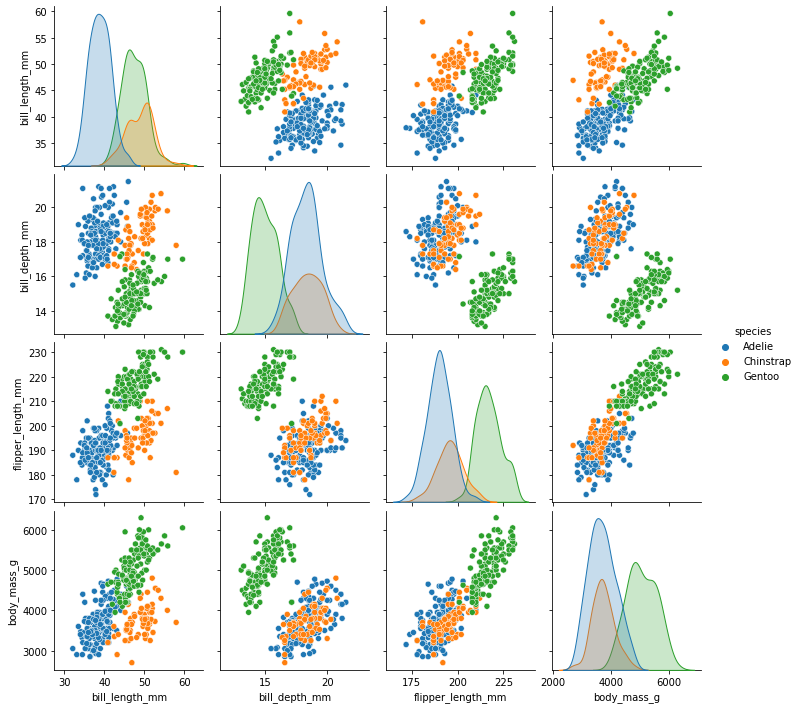

In [11]:
sns.pairplot(penguins_up, hue = 'species')
plt.show()

In [12]:
import scipy as sp
from scipy.stats import chi2_contingency

In [13]:
contigency= pd.crosstab(penguins_up['sex'], penguins_up['species'])
contigency

species,Adelie,Chinstrap,Gentoo
sex,,,
Female,73,34,58
Male,79,34,66


In [14]:
c, p, dof, expected = chi2_contingency(contigency)
print(f"P-Value : {p}")
print(f"Chi2-Value : {c}")
print(f"dof-Value : {dof}")

P-Value : 0.9123297194631974
Chi2-Value : 0.18350763949307053
dof-Value : 2


In [15]:
if(c<sp.stats.chi2.isf(0.05, dof, loc=0, scale=1)):
    print(f"Since c({c.round(2)}) < Significant value({sp.stats.chi2.isf(0.05, dof, loc=0, scale=1).round(2)}), Accept Null hypothesis")
else:
    print(f"Since c > Significant value({sp.stats.chi2.isf(0.05, dof, loc=0, scale=1)}), Reject Null hypothesis")

Since c(0.18) < Significant value(5.99), Accept Null hypothesis


In [16]:
chinstraps = penguins_up[penguins_up['species'] == 'Chinstrap']
adelies = penguins_up[penguins_up['species'] == 'Adelie']
gentoos = penguins_up[penguins_up['species'] == 'Gentoo']

In [17]:
alpha = 0.05

In [18]:
from statsmodels.stats.weightstats import ztest as ztest
ztest_score1,p_value1 = ztest(adelies['flipper_length_mm'], chinstraps['flipper_length_mm'], value=0) 
print(f"p-value = {p_value1}")
if(p_value1 <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")

p-value = 3.9894914192969835e-09
Reject Null Hypothesis


In [19]:
from statsmodels.stats.weightstats import ztest as ztest
ztest_score2,p_value2 = ztest(adelies['flipper_length_mm'], gentoos['flipper_length_mm'], value=0) 
print(f"p-value = {p_value2}")
if(p_value2 <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")

p-value = 3.0289344539771726e-251
Reject Null Hypothesis


In [20]:
from statsmodels.stats.weightstats import ztest as ztest
ztest_score3,p_value3 = ztest(gentoos['flipper_length_mm'], chinstraps['flipper_length_mm'], value=0) 
print(f"p-value = {p_value3}")
if(p_value3 <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")

p-value = 5.9891723503217946e-95
Reject Null Hypothesis


In [19]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [20]:
penguins_up['bill_length_mm'] = mms.fit_transform(penguins_up['bill_length_mm'].values.reshape(-1, 1))
penguins_up['bill_depth_mm'] = mms.fit_transform(penguins_up['bill_depth_mm'].values.reshape(-1, 1))
penguins_up['flipper_length_mm'] = mms.fit_transform(penguins_up['flipper_length_mm'].values.reshape(-1, 1))
penguins_up['body_mass_g'] = mms.fit_transform(penguins_up['body_mass_g'].values.reshape(-1, 1))

In [21]:
penguins_up.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,Male
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,Female
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,Female
3,Adelie,Torgersen,0.429888,0.482282,0.490088,0.417154,Male
4,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,Female


In [22]:
penguins_up.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,0.429888,0.482282,0.490088,0.417154
std,0.197951,0.234408,0.237638,0.222115
min,0.000000,0.000000,0.000000,0.000000
25%,0.260909,0.297619,0.305085,0.236111
50%,0.441818,0.500000,0.423729,0.375000
75%,0.596364,0.666667,0.694915,0.569444
max,1.000000,1.000000,1.000000,1.000000


In [23]:
new_df_dummy = pd.get_dummies(penguins_up, columns = ['sex', 'island'], drop_first = True)

In [24]:
new_df_dummy['species'].replace({'Adelie' : 0,
                                'Chinstrap' : 1,
                                'Gentoo': 2}, inplace = True)

<AxesSubplot: >

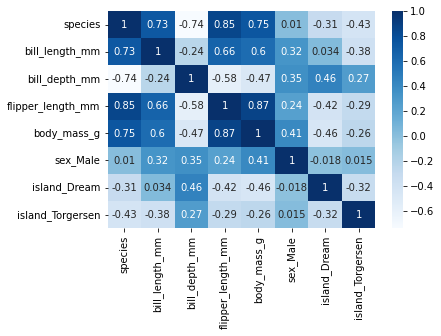

In [25]:
sns.heatmap(new_df_dummy.corr(), annot = True, cmap = 'Blues')

In [28]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [29]:
new_df_dummy

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_Male,island_Dream,island_Torgersen
0,0,0.254545,0.666667,0.152542,0.291667,1,0,1
1,0,0.269091,0.511905,0.237288,0.305556,0,0,1
2,0,0.298182,0.583333,0.389831,0.152778,0,0,1
3,0,0.429888,0.482282,0.490088,0.417154,1,0,1
4,0,0.167273,0.738095,0.355932,0.208333,0,0,1
...,...,...,...,...,...,...,...,...
339,2,0.429888,0.482282,0.490088,0.417154,1,0,0
340,2,0.534545,0.142857,0.728814,0.597222,0,0,0
341,2,0.665455,0.309524,0.847458,0.847222,1,0,0
342,2,0.476364,0.202381,0.677966,0.694444,0,0,0


In [26]:
X = new_df_dummy.drop(columns = ['species','sex_Male'])
Y = new_df_dummy['species']

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

LOGISTIC REGRESSION

In [32]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)
pred = LR.predict(X_test)

In [33]:
print('Accuracy : ', accuracy_score(Y_test, pred))
print('F1 Score : ', f1_score(Y_test, pred, average = 'weighted'))

Accuracy :  1.0
F1 Score :  1.0


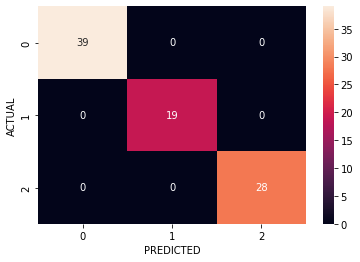

In [34]:
confusion_matrix= pd.crosstab(Y_test,pred, rownames=['ACTUAL'], colnames=['PREDICTED'])
ax = sns.heatmap(confusion_matrix,annot=True)
plt.show()

RANDOM FOREST

In [35]:
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
RFpred = RF.predict(X_test)

In [36]:
print('Accuracy : ', accuracy_score(Y_test, RFpred))
print('F1 Score : ', f1_score(Y_test, RFpred, average = 'weighted'))

Accuracy :  1.0
F1 Score :  1.0


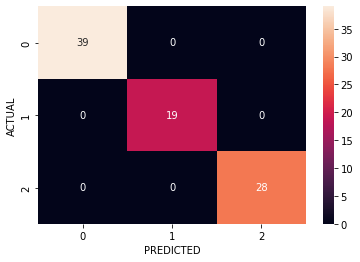

In [37]:
confusion_matrix= pd.crosstab(Y_test,RFpred, rownames=['ACTUAL'], colnames=['PREDICTED'])
ax = sns.heatmap(confusion_matrix,annot=True)
plt.show()

DECISION TREE

In [38]:
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
DTpred = DT.predict(X_test)

In [39]:
print('Accuracy : ', accuracy_score(Y_test, DTpred))
print('F1 Score : ', f1_score(Y_test, DTpred, average = 'weighted'))

Accuracy :  0.9418604651162791
F1 Score :  0.939207145707566


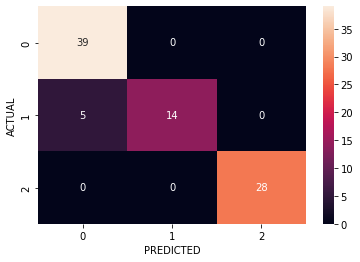

In [40]:
confusion_matrix= pd.crosstab(Y_test,DTpred, rownames=['ACTUAL'], colnames=['PREDICTED'])
ax = sns.heatmap(confusion_matrix,annot=True)
plt.show()

K NEIGHBOURS

In [41]:
KN = KNeighborsClassifier()
KN.fit(X_train, Y_train)
KNpred = KN.predict(X_test)

In [42]:
print('Accuracy : ', accuracy_score(Y_test, KNpred))
print('F1 Score : ', f1_score(Y_test, KNpred, average = 'weighted'))

Accuracy :  1.0
F1 Score :  1.0


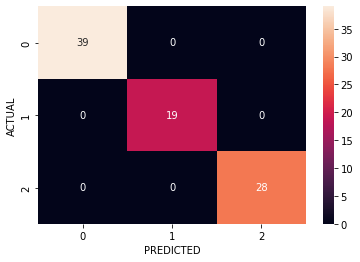

In [43]:
confusion_matrix= pd.crosstab(Y_test,KNpred, rownames=['ACTUAL'], colnames=['PREDICTED'])
ax = sns.heatmap(confusion_matrix,annot=True)
plt.show()

SVM

In [30]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, Y_train)  


SVC(kernel='linear', random_state=0)

In [32]:
y_pred= classifier.predict(X_test)  

In [35]:
print('Accuracy : ', accuracy_score(Y_test, y_pred))
print('F1 Score : ', f1_score(Y_test, y_pred, average = 'weighted'))

Accuracy :  1.0
F1 Score :  1.0


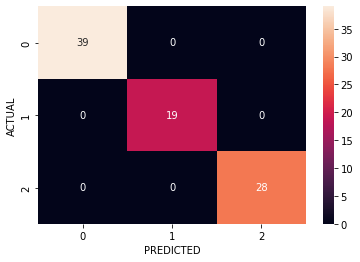

In [36]:
confusion_matrix= pd.crosstab(Y_test,y_pred, rownames=['ACTUAL'], colnames=['PREDICTED'])
ax = sns.heatmap(confusion_matrix,annot=True)
plt.show()

In [31]:
from sklearn.decomposition import PCA

In [46]:
pca=PCA(n_components=2)
pca.fit(X_train)
x_pca=pca.transform(X_train)
print(X_train.shape)
print(x_pca.shape)

In [47]:
pca.fit(X_train)

PCA(n_components=2)

In [48]:
x_pca=pca.transform(X_train)

In [50]:
X_train.shape

(258, 6)

In [51]:
x_pca.shape

(258, 2)

Text(0, 0.5, 'Second principle component')

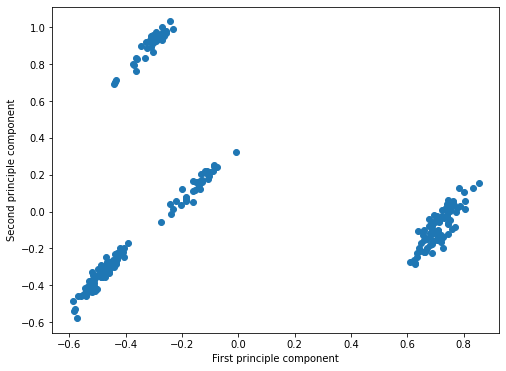

In [54]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [59]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [60]:
labels = model.predict(X)

In [62]:
matrix = pd.DataFrame({'labels': labels, 'species': Y})
ct = pd.crosstab(matrix['labels'], matrix['species'])
print(ct)

species   0   1    2
labels              
0        52   0    0
1        56  68    0
2        44   0  124


In [37]:
from sklearn.cluster import KMeans
import pandas as pd
X = new_df_dummy[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_

new_df_dummy['cluster'] = labels

print(new_df_dummy['cluster'].value_counts())


0    128
1    123
2     93
Name: cluster, dtype: int64


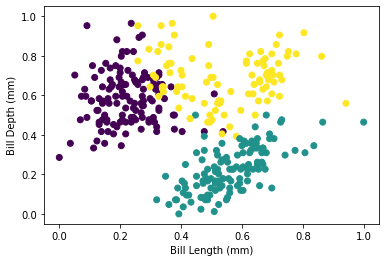

In [38]:
import matplotlib.pyplot as plt

# Plot the KMeans clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

# Add axis labels
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')

# Show the plot
plt.show()
